# PCA with outliers

In [283]:
import sys
sys.path.append('../')
from replicatePPCA import emPPCA

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error as MSE
from natsort import index_natsorted
from matplotlib.colors import Normalize

---

PCA with outliers, and if outliers are just a replicate.
For a particular set of number of features, emPPCA performs better than PCA.

Hard to say if PCA is favoured in detecting outliers, or we should really consider the effect outliers bring into the model.

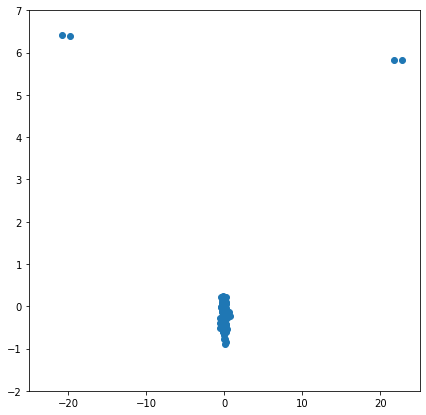

EM algorithm converged with 38 iterations; with relative change 8.978196345208378e-07.


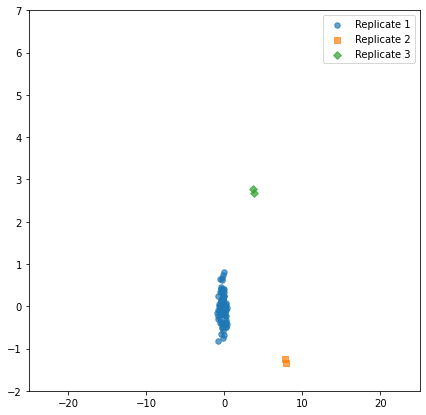

In [285]:
from sklearn.datasets import make_blobs

p=20

# Synthetic data
X, _ = make_blobs(n_samples=100, n_features=p, centers=1, cluster_std=1, random_state=100)

# Add outliers
Y = np.vstack([X, [20]*p, [21]*p, [-20]*p, [-21]*p])  # adding 4 outliers
Y_std = StandardScaler().fit_transform(Y)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Y_std)
plt.figure(figsize=(7, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlim([-25, 25])
plt.ylim([-2, 7])
plt.show();

# emPPCA
Y_rep = [Y_std[:-4], Y_std[-4:-2], Y_std[-2:]]
test = emPPCA(Y=Y_rep, q=2)
test.fit()
test.X_plot(compare='replicate', lims=[-25, 25, -2, 7])

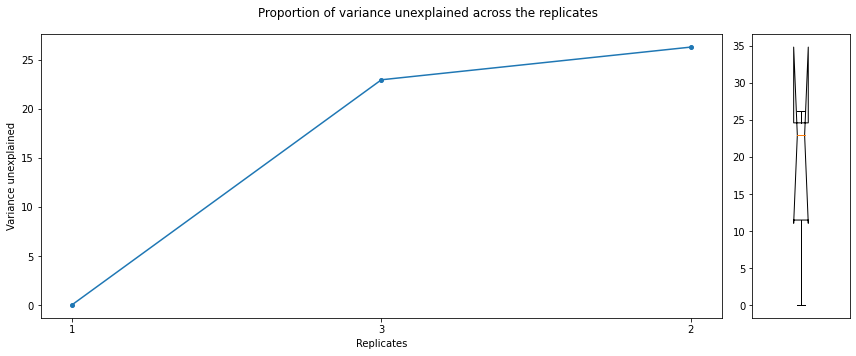

In [210]:
test.variance_plot()